In [1]:


import qgrid



In [5]:


qgrid.nbinstall(overwrite=True)  # copies javascript dependencies to your /nbextensions folder



In [2]:


import pandas as pd
import numpy as np
randn = np.random.randn

# Set this pandas option to prevent the grid from being too big
pd.set_option('display.max_rows', 8)

# Get a pandas DataFrame containing the daily prices for the S&P 500 from 1/1/2011 - 1/1/2014
from pandas.io.data import get_data_yahoo
spy = get_data_yahoo(
    symbols='SPY',  
    start=pd.Timestamp('2011-01-01'),  
    end=pd.Timestamp('2014-01-01'),
    adjust_price=True,
)



C:\Anaconda3\lib\site-packages\pandas\io\data.py:33: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


In [6]:
spy

,Open,High,Low,Close,Volume,Adj_Ratio
Date,,,,,,
2011-01-03,113.782936,114.582137,112.875976,114.088253,138725200,0.897979
2011-01-04,114.339686,114.375606,113.315990,114.025394,137409700,0.897979
2011-01-05,113.666202,114.689897,113.558442,114.618057,133975300,0.897979
2011-01-06,114.662958,114.788676,114.052333,114.393562,122519000,0.897979
...,...,...,...,...,...,...
2013-12-26,175.286319,175.879094,175.267208,175.783481,63365000,0.956072
2013-12-27,176.012944,176.089417,175.592270,175.773926,61814000,0.956072
2013-12-30,175.793037,175.936457,175.515783,175.745245,56857000,0.956072
2013-12-31,175.984263,176.577023,175.850399,176.577023,86119900,0.956072


In [7]:
qgrid.show_grid(spy)

In [ ]:
df2=pd.DataFrame({
            'time':pd.Series(0,index=list(range(100))),
            'voltage':pd.Series(0.)
    })

In [ ]:
df2

In [ ]:
qgrid.show_grid(df2)

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation


def update_line(num, data, line):
    line.set_data(data[..., :num])
    return line,

fig1 = plt.figure()

data = np.random.rand(2, 25)
l, = plt.plot([], [], 'r-')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('x')
plt.title('test')
line_ani = animation.FuncAnimation(fig1, update_line, 25, fargs=(data, l),
                                   interval=50, blit=True)
#line_ani.save('lines.mp4')

fig2 = plt.figure()

x = np.arange(-9, 10)
y = np.arange(-9, 10).reshape(-1, 1)
base = np.hypot(x, y)
ims = []
for add in np.arange(15):
    ims.append((plt.pcolor(x, y, base + add, norm=plt.Normalize(0, 30)),))

im_ani = animation.ArtistAnimation(fig2, ims, interval=50, repeat_delay=3000,
                                   blit=True)
#im_ani.save('im.mp4', metadata={'artist':'Guido'})

plt.show()

In [13]:

import numpy as np
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
import matplotlib.animation as animation


class Scope(object):
    def __init__(self, ax, maxt=2, dt=0.02):
        self.ax = ax
        self.dt = dt
        self.maxt = maxt
        self.tdata = [0]
        self.ydata = [0]
        self.line = Line2D(self.tdata, self.ydata)
        self.ax.add_line(self.line)
        self.ax.set_ylim(-.1, 1.1)
        self.ax.set_xlim(0, self.maxt)

    def update(self, y):
        lastt = self.tdata[-1]
        if lastt > self.tdata[0] + self.maxt:  # reset the arrays
            self.tdata = [self.tdata[-1]]
            self.ydata = [self.ydata[-1]]
            self.ax.set_xlim(self.tdata[0], self.tdata[0] + self.maxt)
            self.ax.figure.canvas.draw()

        t = self.tdata[-1] + self.dt
        self.tdata.append(t)
        self.ydata.append(y)
        self.line.set_data(self.tdata, self.ydata)
        return self.line,


def emitter(p=0.03):
    'return a random value with probability p, else 0'
    while True:
        v = np.random.rand(1)
        if v > p:
            yield 0.
        else:
            yield np.random.rand(1)

fig, ax = plt.subplots()
scope = Scope(ax)

# pass a generator in "emitter" to produce data for the update func
ani = animation.FuncAnimation(fig, scope.update, emitter, interval=10,
                              blit=True)


plt.show()



In [14]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons

fig, ax = plt.subplots()
plt.subplots_adjust(left=0.25, bottom=0.25)
t = np.arange(0.0, 1.0, 0.001)
a0 = 5
f0 = 3
s = a0*np.sin(2*np.pi*f0*t)
l, = plt.plot(t, s, lw=2, color='red')
plt.axis([0, 1, -10, 10])

axcolor = 'lightgoldenrodyellow'
axfreq = plt.axes([0.25, 0.1, 0.65, 0.03], axisbg=axcolor)
axamp = plt.axes([0.25, 0.15, 0.65, 0.03], axisbg=axcolor)

sfreq = Slider(axfreq, 'Freq', 0.1, 30.0, valinit=f0)
samp = Slider(axamp, 'Amp', 0.1, 10.0, valinit=a0)


def update(val):
    amp = samp.val
    freq = sfreq.val
    l.set_ydata(amp*np.sin(2*np.pi*freq*t))
    fig.canvas.draw_idle()
sfreq.on_changed(update)
samp.on_changed(update)

resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', color=axcolor, hovercolor='0.975')


def reset(event):
    sfreq.reset()
    samp.reset()
button.on_clicked(reset)

rax = plt.axes([0.025, 0.5, 0.15, 0.15], axisbg=axcolor)
radio = RadioButtons(rax, ('red', 'blue', 'green'), active=0)


def colorfunc(label):
    l.set_color(label)
    fig.canvas.draw_idle()
radio.on_clicked(colorfunc)

plt.show()

In [79]:
%pylab inline --no-import-all
from IPython.display import Latex
from IPython.html.widgets import interactive
from matplotlib.patches import Polygon


def func(x):
    return (x - 3) * (x - 5) * (x - 6) + 85

def plotint(a=0,  b=5):
    
    x = np.linspace(0, 10)
    y = func(x)
    integration,err=quad(func,a,b)
    fig, ax = plt.subplots()
    plt.plot(x, y, 'r', linewidth=2)
    plt.ylim(ymin=0)

    # Make the shaded region
    ix = np.linspace(a, b)
    iy = func(ix)
    verts = [(a, 0)] + list(zip(ix, iy)) + [(b, 0)]
    poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')
    ax.add_patch(poly)

    plt.text(0.5 * (a + b), 30, r"$\int_a^b f(x)\mathrm{d}x=%.1f$"%integration,
             horizontalalignment='center', fontsize=20)

    plt.figtext(0.9, 0.05, '$x$')
    plt.figtext(0.1, 0.9, '$y$')

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.xaxis.set_ticks_position('bottom')

    ax.set_xticks((a, b))
    ax.set_xticklabels(('$a$', '$b$'))
    ax.set_yticks([])
  
    

Populating the interactive namespace from numpy and matplotlib


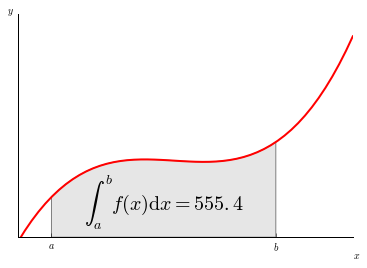

In [80]:
w=interactive(plotint,a=(1.,10.),b=(1.,10))
display(w)

In [45]:
quad(func,1,2)

(55.25000000000001, 6.133982211053991e-13)